***Empiesa la fiehta***

# Libraries

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import string
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

c:\Users\jds25\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


After a while looking for interesting datasets we decided to choose a cybersecutity dataset of threat detection and reaction strategies. Where our target column is 'Response Action'(Wich response was performed by the IA).

We proceed to train and try a model to predict this target.

# Reading the dataset

In [3]:
df= pd.read_csv('Data/ai_ml_cybersecurity_dataset.csv')

In [4]:
df.shape

(20000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Event ID             20000 non-null  object
 1   Timestamp            20000 non-null  object
 2   Source IP            20000 non-null  object
 3   Destination IP       20000 non-null  object
 4   User Agent           20000 non-null  object
 5   Attack Type          20000 non-null  object
 6   Attack Severity      20000 non-null  object
 7   Data Exfiltrated     20000 non-null  bool  
 8   Threat Intelligence  20000 non-null  object
 9   Response Action      20000 non-null  object
dtypes: bool(1), object(9)
memory usage: 1.4+ MB


In [6]:
df

Event ID            Timestamp  \
0      2019969e-ecfa-41c4-b681-9b684bc3b3bf  2020-02-07 23:46:57   
1      1668e954-781f-4731-94dc-24218b983ba1  2021-05-25 19:03:44   
2      0ef24a20-1d25-41fa-81b8-e19fb63e9e4c  2022-01-04 09:08:07   
3      073b6225-0998-488c-aa1c-23e49814b6ff  2022-10-12 19:48:43   
4      783fd153-6b88-44c1-8db5-d882300088cc  2021-11-24 02:04:33   
...                                     ...                  ...   
19995  34e609d3-ce8e-49f3-a552-776496bd0eab  2022-10-26 15:11:16   
19996  ab090f66-e2ba-4560-ab18-254e91bd042d  2022-07-20 08:59:24   
19997  387ec9f5-e808-4753-84bb-deeaf679d592  2020-05-28 22:34:07   
19998  42106391-4666-4c50-9403-70af8084896f  2021-03-10 14:58:36   
19999  9d924511-534b-46db-bd62-dcb929a102bf  2020-08-06 04:28:58   

            Source IP   Destination IP  \
0       219.80.193.15     44.155.75.24   
1      110.155.68.245   178.123.150.38   
2      171.153.115.83   76.187.142.133   
3       29.49.228.195      89.39.7.177   
4        120.43.64.52    113.82.34.164   
...               ...              ...   
19995  50.182.104.127   71.205.220.209   
19996   68.76.164.160  174.127.187.150   
19997  176.103.72.227  214.189.241.210   
19998    42.225.43.82    41.192.165.72   
19999  62.221.185.243    109.185.82.70   

                                              User Agent Attack Type  \
0      Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...  Ransomware   
1      Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...     Malware   
2      Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...  Ransomware   
3      Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...        DDoS   
4      Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...     Malware   
...                                                  ...         ...   
19995  Opera/9.90.(X11; Linux i686; kok-IN) Presto/2....  Ransomware   
19996  Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...  Ransomware   
19997  Opera/9.60.(X11; Linux x86_64; yi-US) Presto/2...  Ransomware   
19998  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...     Malware   
19999  Opera/8.76.(Windows 98; wae-CH) Presto/2.9.171...     Malware   

      Attack Severity  Data Exfiltrated  \
0            Critical             False   
1            Critical              True   
2                High             False   
3            Critical             False   
4              Medium             False   
...               ...               ...   
19995        Critical             False   
19996             Low              True   
19997          Medium             False   
19998        Critical             False   
19999            High              True   

                             Threat Intelligence Response Action  
0      Crime low this behind option tax product.      Eradicated  
1                Responsibility work way effect.      Eradicated  
2          Artist though type imagine food push.      Eradicated  
3             In still military despite TV look.       Contained  
4      Push always least police it range either.      Eradicated  
...                                          ...             ...  
19995                    Forward something wife.       Recovered  
19996             Fund method election possible.      Eradicated  
19997                Network minute act reflect.       Contained  
19998                            Amount sit ten.       Contained  
19999                    Most structure several.       Contained  

[20000 rows x 10 columns]

# EDA

We proceed to analyze logically the dataset, column by column to make a good EDA.

***Event ID Column***

In [7]:
df['Event ID']

0        2019969e-ecfa-41c4-b681-9b684bc3b3bf
1        1668e954-781f-4731-94dc-24218b983ba1
2        0ef24a20-1d25-41fa-81b8-e19fb63e9e4c
3        073b6225-0998-488c-aa1c-23e49814b6ff
4        783fd153-6b88-44c1-8db5-d882300088cc
                         ...                 
19995    34e609d3-ce8e-49f3-a552-776496bd0eab
19996    ab090f66-e2ba-4560-ab18-254e91bd042d
19997    387ec9f5-e808-4753-84bb-deeaf679d592
19998    42106391-4666-4c50-9403-70af8084896f
19999    9d924511-534b-46db-bd62-dcb929a102bf
Name: Event ID, Length: 20000, dtype: object

In [8]:
df['Event ID'].value_counts()

Event ID
2019969e-ecfa-41c4-b681-9b684bc3b3bf    1
736d1dc6-d997-4f22-aec3-985f2d7a2dd0    1
4d648553-26cf-4a99-bcc9-f54d2d432f58    1
eda471f6-e619-489d-8b69-01516879c90b    1
cf1d24f9-3546-4921-b9f9-65ee70e2d1fb    1
                                       ..
fda41630-86b0-4f55-89b9-a06351de4652    1
4f3d4a0b-9277-45e9-abf2-cc6849140527    1
038e5812-f9fe-45e1-829f-df461e088d59    1
56b78c5e-6711-472a-968b-3cc6e46c7ca8    1
9d924511-534b-46db-bd62-dcb929a102bf    1
Name: count, Length: 20000, dtype: int64

As we could know before the logical analysis by observing that it is an ID column, this column has no data repetition and has no point to use it in our model because our model needs coincidences between rows to compare columns. 
We will call this type of columns in this notebook: 'nvar'.

In [9]:
df= df.drop('Event ID', axis= 1)

----------------------------------------------------------------------------------

In [10]:
df

Timestamp       Source IP   Destination IP  \
0      2020-02-07 23:46:57   219.80.193.15     44.155.75.24   
1      2021-05-25 19:03:44  110.155.68.245   178.123.150.38   
2      2022-01-04 09:08:07  171.153.115.83   76.187.142.133   
3      2022-10-12 19:48:43   29.49.228.195      89.39.7.177   
4      2021-11-24 02:04:33    120.43.64.52    113.82.34.164   
...                    ...             ...              ...   
19995  2022-10-26 15:11:16  50.182.104.127   71.205.220.209   
19996  2022-07-20 08:59:24   68.76.164.160  174.127.187.150   
19997  2020-05-28 22:34:07  176.103.72.227  214.189.241.210   
19998  2021-03-10 14:58:36    42.225.43.82    41.192.165.72   
19999  2020-08-06 04:28:58  62.221.185.243    109.185.82.70   

                                              User Agent Attack Type  \
0      Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...  Ransomware   
1      Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...     Malware   
2      Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...  Ransomware   
3      Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...        DDoS   
4      Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...     Malware   
...                                                  ...         ...   
19995  Opera/9.90.(X11; Linux i686; kok-IN) Presto/2....  Ransomware   
19996  Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...  Ransomware   
19997  Opera/9.60.(X11; Linux x86_64; yi-US) Presto/2...  Ransomware   
19998  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...     Malware   
19999  Opera/8.76.(Windows 98; wae-CH) Presto/2.9.171...     Malware   

      Attack Severity  Data Exfiltrated  \
0            Critical             False   
1            Critical              True   
2                High             False   
3            Critical             False   
4              Medium             False   
...               ...               ...   
19995        Critical             False   
19996             Low              True   
19997          Medium             False   
19998        Critical             False   
19999            High              True   

                             Threat Intelligence Response Action  
0      Crime low this behind option tax product.      Eradicated  
1                Responsibility work way effect.      Eradicated  
2          Artist though type imagine food push.      Eradicated  
3             In still military despite TV look.       Contained  
4      Push always least police it range either.      Eradicated  
...                                          ...             ...  
19995                    Forward something wife.       Recovered  
19996             Fund method election possible.      Eradicated  
19997                Network minute act reflect.       Contained  
19998                            Amount sit ten.       Contained  
19999                    Most structure several.       Contained  

[20000 rows x 9 columns]

***Timestamp column***

In [11]:
df['Timestamp']

0        2020-02-07 23:46:57
1        2021-05-25 19:03:44
2        2022-01-04 09:08:07
3        2022-10-12 19:48:43
4        2021-11-24 02:04:33
                ...         
19995    2022-10-26 15:11:16
19996    2022-07-20 08:59:24
19997    2020-05-28 22:34:07
19998    2021-03-10 14:58:36
19999    2020-08-06 04:28:58
Name: Timestamp, Length: 20000, dtype: object

In [12]:
df['Timestamp'].value_counts()

Timestamp
2022-05-22 01:25:51    2
2022-07-19 16:02:22    2
2022-12-17 02:27:08    2
2020-02-07 23:46:57    1
2022-03-07 12:14:23    1
                      ..
2021-06-25 18:21:44    1
2023-06-13 22:50:25    1
2021-05-14 19:07:13    1
2024-01-29 14:38:48    1
2020-08-06 04:28:58    1
Name: count, Length: 19997, dtype: int64

We can see an interesting point here that is there are 3 unique values that are repited 1 time each value.
It could mean 2 things, in one hand its data retrieving error or in the other hand there were 2 incidents in the same second. So we proceed to analyze those rows.

In [13]:
df[df['Timestamp']== '2022-05-22 01:25:51']

Timestamp       Source IP  Destination IP  \
12501  2022-05-22 01:25:51  56.229.254.244   173.229.60.30   
17591  2022-05-22 01:25:51    111.43.52.54  86.122.251.243   

                                              User Agent Attack Type  \
12501  Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...        DDoS   
17591  Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....  Ransomware   

      Attack Severity  Data Exfiltrated                  Threat Intelligence  \
12501             Low             False  To small national image number pay.   
17591             Low             False               Type energy top other.   

      Response Action  
12501       Recovered  
17591       Recovered

First case seems to be normal, just an incidence from a different source to a different destination with different threat intelligence data.

In [14]:
df[df['Timestamp']== '2022-07-19 16:02:22']

Timestamp      Source IP Destination IP  \
5804   2022-07-19 16:02:22  69.231.243.12  197.6.160.230   
15919  2022-07-19 16:02:22  101.19.21.166  157.238.4.141   

                                              User Agent Attack Type  \
5804   Mozilla/5.0 (Android 2.3.5; Mobile; rv:41.0) G...    Phishing   
15919  Mozilla/5.0 (iPhone; CPU iPhone OS 14_2 like M...    Phishing   

      Attack Severity  Data Exfiltrated                   Threat Intelligence  \
5804         Critical             False  Dog entire manager politics provide.   
15919            High             False            Past throw theory morning.   

      Response Action  
5804        Contained  
15919         Blocked

Same here

In [15]:
df[df['Timestamp']== '2022-12-17 02:27:08']

Timestamp      Source IP   Destination IP  \
12630  2022-12-17 02:27:08  142.19.23.110  166.175.153.167   
17538  2022-12-17 02:27:08  48.182.53.230     168.42.54.15   

                                              User Agent     Attack Type  \
12630  Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...  Insider Threat   
17538  Mozilla/5.0 (Windows NT 10.0) AppleWebKit/534....      Ransomware   

      Attack Severity  Data Exfiltrated                Threat Intelligence  \
12630            High             False  Dark whatever board avoid region.   
17538             Low             False     At run read I color we speech.   

      Response Action  
12630       Recovered  
17538       Recovered

And same here

We keep the column to work with it because it has useful data about when the incidents were produced.

---

In [16]:
df

Timestamp       Source IP   Destination IP  \
0      2020-02-07 23:46:57   219.80.193.15     44.155.75.24   
1      2021-05-25 19:03:44  110.155.68.245   178.123.150.38   
2      2022-01-04 09:08:07  171.153.115.83   76.187.142.133   
3      2022-10-12 19:48:43   29.49.228.195      89.39.7.177   
4      2021-11-24 02:04:33    120.43.64.52    113.82.34.164   
...                    ...             ...              ...   
19995  2022-10-26 15:11:16  50.182.104.127   71.205.220.209   
19996  2022-07-20 08:59:24   68.76.164.160  174.127.187.150   
19997  2020-05-28 22:34:07  176.103.72.227  214.189.241.210   
19998  2021-03-10 14:58:36    42.225.43.82    41.192.165.72   
19999  2020-08-06 04:28:58  62.221.185.243    109.185.82.70   

                                              User Agent Attack Type  \
0      Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...  Ransomware   
1      Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...     Malware   
2      Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...  Ransomware   
3      Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...        DDoS   
4      Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...     Malware   
...                                                  ...         ...   
19995  Opera/9.90.(X11; Linux i686; kok-IN) Presto/2....  Ransomware   
19996  Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...  Ransomware   
19997  Opera/9.60.(X11; Linux x86_64; yi-US) Presto/2...  Ransomware   
19998  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...     Malware   
19999  Opera/8.76.(Windows 98; wae-CH) Presto/2.9.171...     Malware   

      Attack Severity  Data Exfiltrated  \
0            Critical             False   
1            Critical              True   
2                High             False   
3            Critical             False   
4              Medium             False   
...               ...               ...   
19995        Critical             False   
19996             Low              True   
19997          Medium             False   
19998        Critical             False   
19999            High              True   

                             Threat Intelligence Response Action  
0      Crime low this behind option tax product.      Eradicated  
1                Responsibility work way effect.      Eradicated  
2          Artist though type imagine food push.      Eradicated  
3             In still military despite TV look.       Contained  
4      Push always least police it range either.      Eradicated  
...                                          ...             ...  
19995                    Forward something wife.       Recovered  
19996             Fund method election possible.      Eradicated  
19997                Network minute act reflect.       Contained  
19998                            Amount sit ten.       Contained  
19999                    Most structure several.       Contained  

[20000 rows x 9 columns]

***Source IP column***

In [17]:
df['Source IP']

0         219.80.193.15
1        110.155.68.245
2        171.153.115.83
3         29.49.228.195
4          120.43.64.52
              ...      
19995    50.182.104.127
19996     68.76.164.160
19997    176.103.72.227
19998      42.225.43.82
19999    62.221.185.243
Name: Source IP, Length: 20000, dtype: object

In [18]:
df['Source IP'].value_counts()

Source IP
219.80.193.15      1
220.200.106.63     1
94.213.115.245     1
210.80.170.163     1
151.60.81.237      1
                  ..
62.86.75.81        1
141.173.236.171    1
134.252.95.134     1
89.174.101.2       1
62.221.185.243     1
Name: count, Length: 20000, dtype: int64

We can observe that there are no repited IP so each incident was made from a different device, but that is the only data we can get from it to train our model because it is a 'nvar' column.

In [19]:
df= df.drop('Source IP', axis= 1)

---

In [20]:
df

Timestamp   Destination IP  \
0      2020-02-07 23:46:57     44.155.75.24   
1      2021-05-25 19:03:44   178.123.150.38   
2      2022-01-04 09:08:07   76.187.142.133   
3      2022-10-12 19:48:43      89.39.7.177   
4      2021-11-24 02:04:33    113.82.34.164   
...                    ...              ...   
19995  2022-10-26 15:11:16   71.205.220.209   
19996  2022-07-20 08:59:24  174.127.187.150   
19997  2020-05-28 22:34:07  214.189.241.210   
19998  2021-03-10 14:58:36    41.192.165.72   
19999  2020-08-06 04:28:58    109.185.82.70   

                                              User Agent Attack Type  \
0      Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...  Ransomware   
1      Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...     Malware   
2      Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...  Ransomware   
3      Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...        DDoS   
4      Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...     Malware   
...                                                  ...         ...   
19995  Opera/9.90.(X11; Linux i686; kok-IN) Presto/2....  Ransomware   
19996  Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...  Ransomware   
19997  Opera/9.60.(X11; Linux x86_64; yi-US) Presto/2...  Ransomware   
19998  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...     Malware   
19999  Opera/8.76.(Windows 98; wae-CH) Presto/2.9.171...     Malware   

      Attack Severity  Data Exfiltrated  \
0            Critical             False   
1            Critical              True   
2                High             False   
3            Critical             False   
4              Medium             False   
...               ...               ...   
19995        Critical             False   
19996             Low              True   
19997          Medium             False   
19998        Critical             False   
19999            High              True   

                             Threat Intelligence Response Action  
0      Crime low this behind option tax product.      Eradicated  
1                Responsibility work way effect.      Eradicated  
2          Artist though type imagine food push.      Eradicated  
3             In still military despite TV look.       Contained  
4      Push always least police it range either.      Eradicated  
...                                          ...             ...  
19995                    Forward something wife.       Recovered  
19996             Fund method election possible.      Eradicated  
19997                Network minute act reflect.       Contained  
19998                            Amount sit ten.       Contained  
19999                    Most structure several.       Contained  

[20000 rows x 8 columns]

***Destination IP***

In [21]:
df['Destination IP']

0           44.155.75.24
1         178.123.150.38
2         76.187.142.133
3            89.39.7.177
4          113.82.34.164
              ...       
19995     71.205.220.209
19996    174.127.187.150
19997    214.189.241.210
19998      41.192.165.72
19999      109.185.82.70
Name: Destination IP, Length: 20000, dtype: object

In [22]:
df['Destination IP']. value_counts()

Destination IP
44.155.75.24      1
208.231.58.254    1
83.94.111.209     1
215.70.59.117     1
115.129.221.51    1
                 ..
115.134.200.5     1
184.40.170.51     1
106.30.207.226    1
27.176.185.103    1
109.185.82.70     1
Name: count, Length: 20000, dtype: int64

It is another 'nvar', so same process.

In [23]:
df= df.drop('Destination IP', axis=1)

---

In [24]:
df

Timestamp                                         User Agent  \
0      2020-02-07 23:46:57  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...   
1      2021-05-25 19:03:44  Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...   
2      2022-01-04 09:08:07  Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...   
3      2022-10-12 19:48:43  Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...   
4      2021-11-24 02:04:33  Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...   
...                    ...                                                ...   
19995  2022-10-26 15:11:16  Opera/9.90.(X11; Linux i686; kok-IN) Presto/2....   
19996  2022-07-20 08:59:24  Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...   
19997  2020-05-28 22:34:07  Opera/9.60.(X11; Linux x86_64; yi-US) Presto/2...   
19998  2021-03-10 14:58:36  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...   
19999  2020-08-06 04:28:58  Opera/8.76.(Windows 98; wae-CH) Presto/2.9.171...   

      Attack Type Attack Severity  Data Exfiltrated  \
0      Ransomware        Critical             False   
1         Malware        Critical              True   
2      Ransomware            High             False   
3            DDoS        Critical             False   
4         Malware          Medium             False   
...           ...             ...               ...   
19995  Ransomware        Critical             False   
19996  Ransomware             Low              True   
19997  Ransomware          Medium             False   
19998     Malware        Critical             False   
19999     Malware            High              True   

                             Threat Intelligence Response Action  
0      Crime low this behind option tax product.      Eradicated  
1                Responsibility work way effect.      Eradicated  
2          Artist though type imagine food push.      Eradicated  
3             In still military despite TV look.       Contained  
4      Push always least police it range either.      Eradicated  
...                                          ...             ...  
19995                    Forward something wife.       Recovered  
19996             Fund method election possible.      Eradicated  
19997                Network minute act reflect.       Contained  
19998                            Amount sit ten.       Contained  
19999                    Most structure several.       Contained  

[20000 rows x 7 columns]

***User Agent column***

In [25]:
df['User Agent']

0        Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...
1        Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...
2        Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...
3        Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...
4        Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...
                               ...                        
19995    Opera/9.90.(X11; Linux i686; kok-IN) Presto/2....
19996    Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...
19997    Opera/9.60.(X11; Linux x86_64; yi-US) Presto/2...
19998    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...
19999    Opera/8.76.(Windows 98; wae-CH) Presto/2.9.171...
Name: User Agent, Length: 20000, dtype: object

In [26]:
df['User Agent'].value_counts()

User Agent
Mozilla/5.0 (compatible; MSIE 8.0; Windows 98; Trident/5.1)                                                                                         19
Mozilla/5.0 (compatible; MSIE 8.0; Windows 98; Win 9x 4.90; Trident/4.1)                                                                            19
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.1; Trident/4.0)                                                                                     19
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 4.0; Trident/3.0)                                                                                     19
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/5.1)                                                                                         18
                                                                                                                                                    ..
Opera/9.89.(Windows NT 6.1; eo-US) Presto/2.9.171 Version/11.00                    

In [27]:
df['User Agent'].value_counts().head(20)

User Agent
Mozilla/5.0 (compatible; MSIE 8.0; Windows 98; Trident/5.1)                 19
Mozilla/5.0 (compatible; MSIE 8.0; Windows 98; Win 9x 4.90; Trident/4.1)    19
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.1; Trident/4.0)             19
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 4.0; Trident/3.0)             19
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/5.1)                 18
Mozilla/5.0 (compatible; MSIE 5.0; Windows CE; Trident/3.0)                 18
Mozilla/5.0 (compatible; MSIE 9.0; Windows 95; Trident/5.1)                 17
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 6.2; Trident/4.1)             17
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 5.2; Trident/5.1)             17
Mozilla/5.0 (compatible; MSIE 8.0; Windows CE; Trident/4.0)                 17
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/3.0)             17
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.0; Trident/3.0)             17
Mozilla/5.0 (compatible; MSIE 7.0; Window

In [28]:
df['User Agent'].value_counts().tail(50)

User Agent
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/536.1 (KHTML, like Gecko) Chrome/23.0.804.0 Safari/536.1                                                   1
Mozilla/5.0 (X11; Linux i686) AppleWebKit/532.2 (KHTML, like Gecko) Chrome/63.0.847.0 Safari/532.2                                                     1
Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_10_5 rv:2.0; it-CH) AppleWebKit/531.18.6 (KHTML, like Gecko) Version/4.0 Safari/531.18.6                    1
Mozilla/5.0 (iPod; U; CPU iPhone OS 4_0 like Mac OS X; iw-IL) AppleWebKit/533.7.1 (KHTML, like Gecko) Version/3.0.5 Mobile/8B111 Safari/6533.7.1       1
Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_10_4 rv:3.0; nhn-MX) AppleWebKit/535.10.2 (KHTML, like Gecko) Version/5.0.4 Safari/535.10.2                 1
Mozilla/5.0 (Linux; Android 5.1.1) AppleWebKit/533.2 (KHTML, like Gecko) Chrome/47.0.896.0 Safari/533.2                                                1
Opera/8.83.(X11; Linux i686; mhr-RU) Presto/2.9.172 Version/11.00      

In [29]:
df['User Agent'].str.startswith('M').value_counts()

User Agent
True     15996
False     4004
Name: count, dtype: int64

In [30]:
df['User Agent'].str.startswith('O').value_counts()

User Agent
False    15996
True      4004
Name: count, dtype: int64

We keep making EDA in this column trying to retrieve the useful info. By now we know  that there are 2 agent users with differences in OS and searcher version in each row.

In [31]:
versions_count= 0

for row in df['User Agent']:

    if 'Trident' in row or 'Safari' in row or 'Presto' in row or 'Firefox' in row:

        versions_count+= 1

versions_count

20000

In [32]:
os_count= 0

for row in df['User Agent']:

    if 'Mac' in row or 'Android' in row or 'Windows' in row or 'Linux' in row:

        os_count+= 1

os_count

20000

Now, when we know how many OS's and searchers versions, we decide to keep this column to work with

---

In [33]:
df

Timestamp                                         User Agent  \
0      2020-02-07 23:46:57  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...   
1      2021-05-25 19:03:44  Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...   
2      2022-01-04 09:08:07  Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...   
3      2022-10-12 19:48:43  Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...   
4      2021-11-24 02:04:33  Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...   
...                    ...                                                ...   
19995  2022-10-26 15:11:16  Opera/9.90.(X11; Linux i686; kok-IN) Presto/2....   
19996  2022-07-20 08:59:24  Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...   
19997  2020-05-28 22:34:07  Opera/9.60.(X11; Linux x86_64; yi-US) Presto/2...   
19998  2021-03-10 14:58:36  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...   
19999  2020-08-06 04:28:58  Opera/8.76.(Windows 98; wae-CH) Presto/2.9.171...   

      Attack Type Attack Severity  Data Exfiltrated  \
0      Ransomware        Critical             False   
1         Malware        Critical              True   
2      Ransomware            High             False   
3            DDoS        Critical             False   
4         Malware          Medium             False   
...           ...             ...               ...   
19995  Ransomware        Critical             False   
19996  Ransomware             Low              True   
19997  Ransomware          Medium             False   
19998     Malware        Critical             False   
19999     Malware            High              True   

                             Threat Intelligence Response Action  
0      Crime low this behind option tax product.      Eradicated  
1                Responsibility work way effect.      Eradicated  
2          Artist though type imagine food push.      Eradicated  
3             In still military despite TV look.       Contained  
4      Push always least police it range either.      Eradicated  
...                                          ...             ...  
19995                    Forward something wife.       Recovered  
19996             Fund method election possible.      Eradicated  
19997                Network minute act reflect.       Contained  
19998                            Amount sit ten.       Contained  
19999                    Most structure several.       Contained  

[20000 rows x 7 columns]

***Attack Type column***

In [34]:
df['Attack Type']

0        Ransomware
1           Malware
2        Ransomware
3              DDoS
4           Malware
            ...    
19995    Ransomware
19996    Ransomware
19997    Ransomware
19998       Malware
19999       Malware
Name: Attack Type, Length: 20000, dtype: object

In [35]:
df['Attack Type'].value_counts()

Attack Type
Malware           4081
Phishing          4056
Insider Threat    3968
Ransomware        3955
DDoS              3940
Name: count, dtype: int64

Here we can see variety so its a useful column, we keep it.

---

In [36]:
df

Timestamp                                         User Agent  \
0      2020-02-07 23:46:57  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...   
1      2021-05-25 19:03:44  Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...   
2      2022-01-04 09:08:07  Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...   
3      2022-10-12 19:48:43  Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...   
4      2021-11-24 02:04:33  Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...   
...                    ...                                                ...   
19995  2022-10-26 15:11:16  Opera/9.90.(X11; Linux i686; kok-IN) Presto/2....   
19996  2022-07-20 08:59:24  Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...   
19997  2020-05-28 22:34:07  Opera/9.60.(X11; Linux x86_64; yi-US) Presto/2...   
19998  2021-03-10 14:58:36  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...   
19999  2020-08-06 04:28:58  Opera/8.76.(Windows 98; wae-CH) Presto/2.9.171...   

      Attack Type Attack Severity  Data Exfiltrated  \
0      Ransomware        Critical             False   
1         Malware        Critical              True   
2      Ransomware            High             False   
3            DDoS        Critical             False   
4         Malware          Medium             False   
...           ...             ...               ...   
19995  Ransomware        Critical             False   
19996  Ransomware             Low              True   
19997  Ransomware          Medium             False   
19998     Malware        Critical             False   
19999     Malware            High              True   

                             Threat Intelligence Response Action  
0      Crime low this behind option tax product.      Eradicated  
1                Responsibility work way effect.      Eradicated  
2          Artist though type imagine food push.      Eradicated  
3             In still military despite TV look.       Contained  
4      Push always least police it range either.      Eradicated  
...                                          ...             ...  
19995                    Forward something wife.       Recovered  
19996             Fund method election possible.      Eradicated  
19997                Network minute act reflect.       Contained  
19998                            Amount sit ten.       Contained  
19999                    Most structure several.       Contained  

[20000 rows x 7 columns]

***Attack Severity column***

In [37]:
df['Attack Severity']

0        Critical
1        Critical
2            High
3        Critical
4          Medium
           ...   
19995    Critical
19996         Low
19997      Medium
19998    Critical
19999        High
Name: Attack Severity, Length: 20000, dtype: object

In [38]:
df['Attack Severity'].value_counts()

Attack Severity
Low         5073
High        5053
Critical    5025
Medium      4849
Name: count, dtype: int64

Variety again, useful too.

---

In [39]:
df

Timestamp                                         User Agent  \
0      2020-02-07 23:46:57  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...   
1      2021-05-25 19:03:44  Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...   
2      2022-01-04 09:08:07  Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...   
3      2022-10-12 19:48:43  Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...   
4      2021-11-24 02:04:33  Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...   
...                    ...                                                ...   
19995  2022-10-26 15:11:16  Opera/9.90.(X11; Linux i686; kok-IN) Presto/2....   
19996  2022-07-20 08:59:24  Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...   
19997  2020-05-28 22:34:07  Opera/9.60.(X11; Linux x86_64; yi-US) Presto/2...   
19998  2021-03-10 14:58:36  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...   
19999  2020-08-06 04:28:58  Opera/8.76.(Windows 98; wae-CH) Presto/2.9.171...   

      Attack Type Attack Severity  Data Exfiltrated  \
0      Ransomware        Critical             False   
1         Malware        Critical              True   
2      Ransomware            High             False   
3            DDoS        Critical             False   
4         Malware          Medium             False   
...           ...             ...               ...   
19995  Ransomware        Critical             False   
19996  Ransomware             Low              True   
19997  Ransomware          Medium             False   
19998     Malware        Critical             False   
19999     Malware            High              True   

                             Threat Intelligence Response Action  
0      Crime low this behind option tax product.      Eradicated  
1                Responsibility work way effect.      Eradicated  
2          Artist though type imagine food push.      Eradicated  
3             In still military despite TV look.       Contained  
4      Push always least police it range either.      Eradicated  
...                                          ...             ...  
19995                    Forward something wife.       Recovered  
19996             Fund method election possible.      Eradicated  
19997                Network minute act reflect.       Contained  
19998                            Amount sit ten.       Contained  
19999                    Most structure several.       Contained  

[20000 rows x 7 columns]

***Data Exfiltrated column***

In [40]:
df['Data Exfiltrated']

0        False
1         True
2        False
3        False
4        False
         ...  
19995    False
19996     True
19997    False
19998    False
19999     True
Name: Data Exfiltrated, Length: 20000, dtype: bool

In [41]:
df['Data Exfiltrated'].value_counts()

Data Exfiltrated
False    18081
True      1919
Name: count, dtype: int64

It is a boolean column where we can see that the most of times the incidents didn't get filtered data. Anyway it is still useful because shows a variation of data so our model can compare other features with it.

---

In [42]:
df

Timestamp                                         User Agent  \
0      2020-02-07 23:46:57  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...   
1      2021-05-25 19:03:44  Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...   
2      2022-01-04 09:08:07  Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...   
3      2022-10-12 19:48:43  Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...   
4      2021-11-24 02:04:33  Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...   
...                    ...                                                ...   
19995  2022-10-26 15:11:16  Opera/9.90.(X11; Linux i686; kok-IN) Presto/2....   
19996  2022-07-20 08:59:24  Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...   
19997  2020-05-28 22:34:07  Opera/9.60.(X11; Linux x86_64; yi-US) Presto/2...   
19998  2021-03-10 14:58:36  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...   
19999  2020-08-06 04:28:58  Opera/8.76.(Windows 98; wae-CH) Presto/2.9.171...   

      Attack Type Attack Severity  Data Exfiltrated  \
0      Ransomware        Critical             False   
1         Malware        Critical              True   
2      Ransomware            High             False   
3            DDoS        Critical             False   
4         Malware          Medium             False   
...           ...             ...               ...   
19995  Ransomware        Critical             False   
19996  Ransomware             Low              True   
19997  Ransomware          Medium             False   
19998     Malware        Critical             False   
19999     Malware            High              True   

                             Threat Intelligence Response Action  
0      Crime low this behind option tax product.      Eradicated  
1                Responsibility work way effect.      Eradicated  
2          Artist though type imagine food push.      Eradicated  
3             In still military despite TV look.       Contained  
4      Push always least police it range either.      Eradicated  
...                                          ...             ...  
19995                    Forward something wife.       Recovered  
19996             Fund method election possible.      Eradicated  
19997                Network minute act reflect.       Contained  
19998                            Amount sit ten.       Contained  
19999                    Most structure several.       Contained  

[20000 rows x 7 columns]

***Threat Intelligence column***

In [43]:
df['Threat Intelligence']

0        Crime low this behind option tax product.
1                  Responsibility work way effect.
2            Artist though type imagine food push.
3               In still military despite TV look.
4        Push always least police it range either.
                           ...                    
19995                      Forward something wife.
19996               Fund method election possible.
19997                  Network minute act reflect.
19998                              Amount sit ten.
19999                      Most structure several.
Name: Threat Intelligence, Length: 20000, dtype: object

In [44]:
for row in df['Threat Intelligence']:

    print(len(row.split()))

7
4
6
6
7
5
4
7
6
6
5
8
7
7
6
6
3
3
5
5
7
3
4
4
5
4
6
8
4
6
6
7
3
6
7
3
6
6
7
6
6
7
5
5
6
5
6
5
5
4
5
4
5
8
7
6
8
8
8
4
5
8
5
8
8
4
4
7
5
4
3
3
6
4
8
7
7
4
4
6
6
5
6
6
6
4
6
3
4
7
5
5
5
4
7
6
6
8
5
6
8
6
6
7
4
5
7
7
5
5
5
4
4
3
7
8
7
4
5
6
3
5
4
6
6
8
8
5
5
6
8
8
4
7
7
3
4
7
4
3
4
3
7
3
5
3
3
6
3
7
6
6
7
7
4
6
4
4
4
7
7
5
5
8
4
6
4
7
6
6
6
7
7
5
3
6
4
6
4
6
4
6
3
8
6
3
6
6
5
5
4
4
5
7
6
4
5
8
4
6
8
4
6
4
7
6
5
5
7
7
6
6
6
4
6
4
5
4
6
4
7
4
7
6
8
6
6
8
8
4
5
7
6
7
7
6
5
5
4
6
8
6
7
4
6
3
5
8
6
5
5
8
6
4
7
4
5
7
7
6
4
4
6
3
7
6
7
4
7
8
8
6
5
5
5
6
5
7
7
4
6
4
6
4
7
6
6
5
7
7
4
5
5
6
4
4
4
6
5
8
5
5
6
7
7
8
7
4
5
7
6
7
4
7
4
5
4
7
7
7
7
6
6
5
6
4
5
6
4
8
3
6
6
5
4
4
5
6
3
6
7
5
6
7
4
6
5
6
8
3
6
5
4
6
5
5
5
6
4
6
7
7
3
4
6
8
8
4
5
4
4
7
4
3
3
4
7
5
7
7
7
5
4
7
7
6
4
4
7
7
7
5
7
8
7
8
6
8
6
6
3
4
7
4
4
5
3
8
6
4
6
8
4
3
8
4
7
7
6
5
5
8
8
5
5
4
4
7
3
5
4
3
4
7
7
7
4
3
3
4
6
5
4
6
3
5
5
6
6
5
8
5
5
7
8
7
7
3
7
5
6
5
7
3
5
4
6
8
8
4
6
8
5
5
5
4
6
6
8
8
4
8
6
5
6
6
5
5
4
8
7
4
7
6
4
5
6
5
3
6


It is a weird column. We will try to keep this column to make an NLP.

---

In [45]:
df

Timestamp                                         User Agent  \
0      2020-02-07 23:46:57  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...   
1      2021-05-25 19:03:44  Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...   
2      2022-01-04 09:08:07  Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...   
3      2022-10-12 19:48:43  Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...   
4      2021-11-24 02:04:33  Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...   
...                    ...                                                ...   
19995  2022-10-26 15:11:16  Opera/9.90.(X11; Linux i686; kok-IN) Presto/2....   
19996  2022-07-20 08:59:24  Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...   
19997  2020-05-28 22:34:07  Opera/9.60.(X11; Linux x86_64; yi-US) Presto/2...   
19998  2021-03-10 14:58:36  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...   
19999  2020-08-06 04:28:58  Opera/8.76.(Windows 98; wae-CH) Presto/2.9.171...   

      Attack Type Attack Severity  Data Exfiltrated  \
0      Ransomware        Critical             False   
1         Malware        Critical              True   
2      Ransomware            High             False   
3            DDoS        Critical             False   
4         Malware          Medium             False   
...           ...             ...               ...   
19995  Ransomware        Critical             False   
19996  Ransomware             Low              True   
19997  Ransomware          Medium             False   
19998     Malware        Critical             False   
19999     Malware            High              True   

                             Threat Intelligence Response Action  
0      Crime low this behind option tax product.      Eradicated  
1                Responsibility work way effect.      Eradicated  
2          Artist though type imagine food push.      Eradicated  
3             In still military despite TV look.       Contained  
4      Push always least police it range either.      Eradicated  
...                                          ...             ...  
19995                    Forward something wife.       Recovered  
19996             Fund method election possible.      Eradicated  
19997                Network minute act reflect.       Contained  
19998                            Amount sit ten.       Contained  
19999                    Most structure several.       Contained  

[20000 rows x 7 columns]

***Response Action column(target)***

In [46]:
df['Response Action']

0        Eradicated
1        Eradicated
2        Eradicated
3         Contained
4        Eradicated
            ...    
19995     Recovered
19996    Eradicated
19997     Contained
19998     Contained
19999     Contained
Name: Response Action, Length: 20000, dtype: object

In [47]:
df['Response Action'].unique()

array(['Eradicated', 'Contained', 'Recovered', 'Blocked'], dtype=object)

As we can see, it is a problem of classification.

In [48]:
df

Timestamp                                         User Agent  \
0      2020-02-07 23:46:57  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...   
1      2021-05-25 19:03:44  Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...   
2      2022-01-04 09:08:07  Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...   
3      2022-10-12 19:48:43  Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...   
4      2021-11-24 02:04:33  Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...   
...                    ...                                                ...   
19995  2022-10-26 15:11:16  Opera/9.90.(X11; Linux i686; kok-IN) Presto/2....   
19996  2022-07-20 08:59:24  Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...   
19997  2020-05-28 22:34:07  Opera/9.60.(X11; Linux x86_64; yi-US) Presto/2...   
19998  2021-03-10 14:58:36  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...   
19999  2020-08-06 04:28:58  Opera/8.76.(Windows 98; wae-CH) Presto/2.9.171...   

      Attack Type Attack Severity  Data Exfiltrated  \
0      Ransomware        Critical             False   
1         Malware        Critical              True   
2      Ransomware            High             False   
3            DDoS        Critical             False   
4         Malware          Medium             False   
...           ...             ...               ...   
19995  Ransomware        Critical             False   
19996  Ransomware             Low              True   
19997  Ransomware          Medium             False   
19998     Malware        Critical             False   
19999     Malware            High              True   

                             Threat Intelligence Response Action  
0      Crime low this behind option tax product.      Eradicated  
1                Responsibility work way effect.      Eradicated  
2          Artist though type imagine food push.      Eradicated  
3             In still military despite TV look.       Contained  
4      Push always least police it range either.      Eradicated  
...                                          ...             ...  
19995                    Forward something wife.       Recovered  
19996             Fund method election possible.      Eradicated  
19997                Network minute act reflect.       Contained  
19998                            Amount sit ten.       Contained  
19999                    Most structure several.       Contained  

[20000 rows x 7 columns]

Now we proceed to the preprocessing.

# Preprocessing

In [49]:
df

Timestamp                                         User Agent  \
0      2020-02-07 23:46:57  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...   
1      2021-05-25 19:03:44  Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...   
2      2022-01-04 09:08:07  Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...   
3      2022-10-12 19:48:43  Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...   
4      2021-11-24 02:04:33  Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...   
...                    ...                                                ...   
19995  2022-10-26 15:11:16  Opera/9.90.(X11; Linux i686; kok-IN) Presto/2....   
19996  2022-07-20 08:59:24  Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...   
19997  2020-05-28 22:34:07  Opera/9.60.(X11; Linux x86_64; yi-US) Presto/2...   
19998  2021-03-10 14:58:36  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...   
19999  2020-08-06 04:28:58  Opera/8.76.(Windows 98; wae-CH) Presto/2.9.171...   

      Attack Type Attack Severity  Data Exfiltrated  \
0      Ransomware        Critical             False   
1         Malware        Critical              True   
2      Ransomware            High             False   
3            DDoS        Critical             False   
4         Malware          Medium             False   
...           ...             ...               ...   
19995  Ransomware        Critical             False   
19996  Ransomware             Low              True   
19997  Ransomware          Medium             False   
19998     Malware        Critical             False   
19999     Malware            High              True   

                             Threat Intelligence Response Action  
0      Crime low this behind option tax product.      Eradicated  
1                Responsibility work way effect.      Eradicated  
2          Artist though type imagine food push.      Eradicated  
3             In still military despite TV look.       Contained  
4      Push always least police it range either.      Eradicated  
...                                          ...             ...  
19995                    Forward something wife.       Recovered  
19996             Fund method election possible.      Eradicated  
19997                Network minute act reflect.       Contained  
19998                            Amount sit ten.       Contained  
19999                    Most structure several.       Contained  

[20000 rows x 7 columns]

***Timestamp column***

In [50]:
df['Timestamp']

0        2020-02-07 23:46:57
1        2021-05-25 19:03:44
2        2022-01-04 09:08:07
3        2022-10-12 19:48:43
4        2021-11-24 02:04:33
                ...         
19995    2022-10-26 15:11:16
19996    2022-07-20 08:59:24
19997    2020-05-28 22:34:07
19998    2021-03-10 14:58:36
19999    2020-08-06 04:28:58
Name: Timestamp, Length: 20000, dtype: object

We proceed to change the format into timestamp that is a numeric value to train models.

In [51]:
df['Timestamp']= df['Timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
type(df.iloc[0, 0])

pandas._libs.tslibs.timestamps.Timestamp

In [52]:
df['Timestamp']= df['Timestamp'].apply(lambda x: datetime.timestamp(x))
df['Timestamp']

0        1.581116e+09
1        1.621962e+09
2        1.641284e+09
3        1.665597e+09
4        1.637716e+09
             ...     
19995    1.666790e+09
19996    1.658300e+09
19997    1.590698e+09
19998    1.615385e+09
19999    1.596681e+09
Name: Timestamp, Length: 20000, dtype: float64

---

In [53]:
df

Timestamp                                         User Agent  \
0      1.581116e+09  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...   
1      1.621962e+09  Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...   
2      1.641284e+09  Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...   
3      1.665597e+09  Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...   
4      1.637716e+09  Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...   
...             ...                                                ...   
19995  1.666790e+09  Opera/9.90.(X11; Linux i686; kok-IN) Presto/2....   
19996  1.658300e+09  Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...   
19997  1.590698e+09  Opera/9.60.(X11; Linux x86_64; yi-US) Presto/2...   
19998  1.615385e+09  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...   
19999  1.596681e+09  Opera/8.76.(Windows 98; wae-CH) Presto/2.9.171...   

      Attack Type Attack Severity  Data Exfiltrated  \
0      Ransomware        Critical             False   
1         Malware        Critical              True   
2      Ransomware            High             False   
3            DDoS        Critical             False   
4         Malware          Medium             False   
...           ...             ...               ...   
19995  Ransomware        Critical             False   
19996  Ransomware             Low              True   
19997  Ransomware          Medium             False   
19998     Malware        Critical             False   
19999     Malware            High              True   

                             Threat Intelligence Response Action  
0      Crime low this behind option tax product.      Eradicated  
1                Responsibility work way effect.      Eradicated  
2          Artist though type imagine food push.      Eradicated  
3             In still military despite TV look.       Contained  
4      Push always least police it range either.      Eradicated  
...                                          ...             ...  
19995                    Forward something wife.       Recovered  
19996             Fund method election possible.      Eradicated  
19997                Network minute act reflect.       Contained  
19998                            Amount sit ten.       Contained  
19999                    Most structure several.       Contained  

[20000 rows x 7 columns]

***User Agent column***

Here we try to get good data separating the parts that repeats in rows.

In [54]:
df['User Agent']

0        Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...
1        Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...
2        Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...
3        Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...
4        Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...
                               ...                        
19995    Opera/9.90.(X11; Linux i686; kok-IN) Presto/2....
19996    Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...
19997    Opera/9.60.(X11; Linux x86_64; yi-US) Presto/2...
19998    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...
19999    Opera/8.76.(Windows 98; wae-CH) Presto/2.9.171...
Name: User Agent, Length: 20000, dtype: object

In [55]:
user_agent_list= list()
os_list= list()
sv_list= list()

for row in df['User Agent']:

    #User Agent
    if 'Mozilla' in row:

        user_agent_list.append('Mozilla')
    
    elif 'Opera' in row:

        user_agent_list.append('Opera')
    
    #OS
    if 'Mac' in row:

        os_list.append('Mac')

    elif 'Windows' in row:

        os_list.append('Windows')

    elif 'Linux' in row:

        os_list.append('Linux')

    elif 'Android' in row:

        os_list.append('Android')
    
    #Searcher version
    if 'Firefox' in row:

        sv_list.append('Firefox')

    elif 'Trident' in row:

        sv_list.append('Trident')
    
    elif 'Safari' in row:

        sv_list.append('Safari')

    elif 'Presto' in row:

        sv_list.append('Presto')

In [56]:
df_1= pd.DataFrame(user_agent_list, columns= ['User_Agent'])
df_2= pd.DataFrame(os_list, columns=['OS'])
df_3= pd.DataFrame(sv_list, columns=['SV'])

df= pd.concat([df, df_1, df_2, df_3], axis=1)
df= df.drop('User Agent', axis=1)

To make an easier way to work and understand the process we will preprocess the columns product of this last step after, to keep the column processing orther

---

In [57]:
df

Timestamp Attack Type Attack Severity  Data Exfiltrated  \
0      1.581116e+09  Ransomware        Critical             False   
1      1.621962e+09     Malware        Critical              True   
2      1.641284e+09  Ransomware            High             False   
3      1.665597e+09        DDoS        Critical             False   
4      1.637716e+09     Malware          Medium             False   
...             ...         ...             ...               ...   
19995  1.666790e+09  Ransomware        Critical             False   
19996  1.658300e+09  Ransomware             Low              True   
19997  1.590698e+09  Ransomware          Medium             False   
19998  1.615385e+09     Malware        Critical             False   
19999  1.596681e+09     Malware            High              True   

                             Threat Intelligence Response Action User_Agent  \
0      Crime low this behind option tax product.      Eradicated    Mozilla   
1                Responsibility work way effect.      Eradicated    Mozilla   
2          Artist though type imagine food push.      Eradicated    Mozilla   
3             In still military despite TV look.       Contained    Mozilla   
4      Push always least police it range either.      Eradicated    Mozilla   
...                                          ...             ...        ...   
19995                    Forward something wife.       Recovered      Opera   
19996             Fund method election possible.      Eradicated    Mozilla   
19997                Network minute act reflect.       Contained      Opera   
19998                            Amount sit ten.       Contained    Mozilla   
19999                    Most structure several.       Contained      Opera   

            OS       SV  
0          Mac   Safari  
1      Windows   Safari  
2        Linux  Firefox  
3        Linux   Safari  
4          Mac   Safari  
...        ...      ...  
19995    Linux   Presto  
19996      Mac   Safari  
19997    Linux   Presto  
19998      Mac   Safari  
19999  Windows   Presto  

[20000 rows x 9 columns]

In [58]:
df['Attack Type']

0        Ransomware
1           Malware
2        Ransomware
3              DDoS
4           Malware
            ...    
19995    Ransomware
19996    Ransomware
19997    Ransomware
19998       Malware
19999       Malware
Name: Attack Type, Length: 20000, dtype: object

In [59]:
# encoder= OneHotEncoder(sparse_output= False)
# df_encoder= encoder.fit_transform(df['Attack Type'])
# df_encoder

To make a good classification that keeps representing the logic of the data we decide to make a 'get_dummies'.

In [60]:
target_dict2= {'DDoS': 0,
            'Insider Threat': 1,
            'Malware': 2,
            'Phishing': 3,
            'Ransomware': 4}

df['Attack Type']= df['Attack Type'].replace(target_dict2)

C:\Users\jds25\AppData\Local\Temp\ipykernel_16444\874144310.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Attack Type']= df['Attack Type'].replace(target_dict2)


In [61]:
# df= pd.get_dummies(df, columns=['Attack Type'])
# df

---

In [62]:
df

Timestamp  Attack Type Attack Severity  Data Exfiltrated  \
0      1.581116e+09            4        Critical             False   
1      1.621962e+09            2        Critical              True   
2      1.641284e+09            4            High             False   
3      1.665597e+09            0        Critical             False   
4      1.637716e+09            2          Medium             False   
...             ...          ...             ...               ...   
19995  1.666790e+09            4        Critical             False   
19996  1.658300e+09            4             Low              True   
19997  1.590698e+09            4          Medium             False   
19998  1.615385e+09            2        Critical             False   
19999  1.596681e+09            2            High              True   

                             Threat Intelligence Response Action User_Agent  \
0      Crime low this behind option tax product.      Eradicated    Mozilla   
1                Responsibility work way effect.      Eradicated    Mozilla   
2          Artist though type imagine food push.      Eradicated    Mozilla   
3             In still military despite TV look.       Contained    Mozilla   
4      Push always least police it range either.      Eradicated    Mozilla   
...                                          ...             ...        ...   
19995                    Forward something wife.       Recovered      Opera   
19996             Fund method election possible.      Eradicated    Mozilla   
19997                Network minute act reflect.       Contained      Opera   
19998                            Amount sit ten.       Contained    Mozilla   
19999                    Most structure several.       Contained      Opera   

            OS       SV  
0          Mac   Safari  
1      Windows   Safari  
2        Linux  Firefox  
3        Linux   Safari  
4          Mac   Safari  
...        ...      ...  
19995    Linux   Presto  
19996      Mac   Safari  
19997    Linux   Presto  
19998      Mac   Safari  
19999  Windows   Presto  

[20000 rows x 9 columns]

***Attack Severity column***

In [63]:
df['Attack Severity']

0        Critical
1        Critical
2            High
3        Critical
4          Medium
           ...   
19995    Critical
19996         Low
19997      Medium
19998    Critical
19999        High
Name: Attack Severity, Length: 20000, dtype: object

Here is interesting to keep the order of the severity by making encoding.

In [64]:
df['Attack Severity']= df['Attack Severity'].replace(['Low', 'Medium', 'High', 'Critical'], [0, 1, 2, 3])
df

C:\Users\jds25\AppData\Local\Temp\ipykernel_16444\3107515685.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Attack Severity']= df['Attack Severity'].replace(['Low', 'Medium', 'High', 'Critical'], [0, 1, 2, 3])


Timestamp  Attack Type  Attack Severity  Data Exfiltrated  \
0      1.581116e+09            4                3             False   
1      1.621962e+09            2                3              True   
2      1.641284e+09            4                2             False   
3      1.665597e+09            0                3             False   
4      1.637716e+09            2                1             False   
...             ...          ...              ...               ...   
19995  1.666790e+09            4                3             False   
19996  1.658300e+09            4                0              True   
19997  1.590698e+09            4                1             False   
19998  1.615385e+09            2                3             False   
19999  1.596681e+09            2                2              True   

                             Threat Intelligence Response Action User_Agent  \
0      Crime low this behind option tax product.      Eradicated    Mozilla   
1                Responsibility work way effect.      Eradicated    Mozilla   
2          Artist though type imagine food push.      Eradicated    Mozilla   
3             In still military despite TV look.       Contained    Mozilla   
4      Push always least police it range either.      Eradicated    Mozilla   
...                                          ...             ...        ...   
19995                    Forward something wife.       Recovered      Opera   
19996             Fund method election possible.      Eradicated    Mozilla   
19997                Network minute act reflect.       Contained      Opera   
19998                            Amount sit ten.       Contained    Mozilla   
19999                    Most structure several.       Contained      Opera   

            OS       SV  
0          Mac   Safari  
1      Windows   Safari  
2        Linux  Firefox  
3        Linux   Safari  
4          Mac   Safari  
...        ...      ...  
19995    Linux   Presto  
19996      Mac   Safari  
19997    Linux   Presto  
19998      Mac   Safari  
19999  Windows   Presto  

[20000 rows x 9 columns]

---

In [65]:
df

Timestamp  Attack Type  Attack Severity  Data Exfiltrated  \
0      1.581116e+09            4                3             False   
1      1.621962e+09            2                3              True   
2      1.641284e+09            4                2             False   
3      1.665597e+09            0                3             False   
4      1.637716e+09            2                1             False   
...             ...          ...              ...               ...   
19995  1.666790e+09            4                3             False   
19996  1.658300e+09            4                0              True   
19997  1.590698e+09            4                1             False   
19998  1.615385e+09            2                3             False   
19999  1.596681e+09            2                2              True   

                             Threat Intelligence Response Action User_Agent  \
0      Crime low this behind option tax product.      Eradicated    Mozilla   
1                Responsibility work way effect.      Eradicated    Mozilla   
2          Artist though type imagine food push.      Eradicated    Mozilla   
3             In still military despite TV look.       Contained    Mozilla   
4      Push always least police it range either.      Eradicated    Mozilla   
...                                          ...             ...        ...   
19995                    Forward something wife.       Recovered      Opera   
19996             Fund method election possible.      Eradicated    Mozilla   
19997                Network minute act reflect.       Contained      Opera   
19998                            Amount sit ten.       Contained    Mozilla   
19999                    Most structure several.       Contained      Opera   

            OS       SV  
0          Mac   Safari  
1      Windows   Safari  
2        Linux  Firefox  
3        Linux   Safari  
4          Mac   Safari  
...        ...      ...  
19995    Linux   Presto  
19996      Mac   Safari  
19997    Linux   Presto  
19998      Mac   Safari  
19999  Windows   Presto  

[20000 rows x 9 columns]

***Data Exfiltrated column***

In [66]:
df['Data Exfiltrated']

0        False
1         True
2        False
3        False
4        False
         ...  
19995    False
19996     True
19997    False
19998    False
19999     True
Name: Data Exfiltrated, Length: 20000, dtype: bool

This column is ready to train.

---

In [67]:
df

Timestamp  Attack Type  Attack Severity  Data Exfiltrated  \
0      1.581116e+09            4                3             False   
1      1.621962e+09            2                3              True   
2      1.641284e+09            4                2             False   
3      1.665597e+09            0                3             False   
4      1.637716e+09            2                1             False   
...             ...          ...              ...               ...   
19995  1.666790e+09            4                3             False   
19996  1.658300e+09            4                0              True   
19997  1.590698e+09            4                1             False   
19998  1.615385e+09            2                3             False   
19999  1.596681e+09            2                2              True   

                             Threat Intelligence Response Action User_Agent  \
0      Crime low this behind option tax product.      Eradicated    Mozilla   
1                Responsibility work way effect.      Eradicated    Mozilla   
2          Artist though type imagine food push.      Eradicated    Mozilla   
3             In still military despite TV look.       Contained    Mozilla   
4      Push always least police it range either.      Eradicated    Mozilla   
...                                          ...             ...        ...   
19995                    Forward something wife.       Recovered      Opera   
19996             Fund method election possible.      Eradicated    Mozilla   
19997                Network minute act reflect.       Contained      Opera   
19998                            Amount sit ten.       Contained    Mozilla   
19999                    Most structure several.       Contained      Opera   

            OS       SV  
0          Mac   Safari  
1      Windows   Safari  
2        Linux  Firefox  
3        Linux   Safari  
4          Mac   Safari  
...        ...      ...  
19995    Linux   Presto  
19996      Mac   Safari  
19997    Linux   Presto  
19998      Mac   Safari  
19999  Windows   Presto  

[20000 rows x 9 columns]

***Threat Intelligence***

In [68]:
df['Threat Intelligence']

0        Crime low this behind option tax product.
1                  Responsibility work way effect.
2            Artist though type imagine food push.
3               In still military despite TV look.
4        Push always least police it range either.
                           ...                    
19995                      Forward something wife.
19996               Fund method election possible.
19997                  Network minute act reflect.
19998                              Amount sit ten.
19999                      Most structure several.
Name: Threat Intelligence, Length: 20000, dtype: object

For this column we are implementing a NLP.

Here we tokenize and clean the column.

In [69]:
lemmatizer = WordNetLemmatizer()

stopwords = nltk.corpus.stopwords.words("english")
punctuation= (string.punctuation)
stopwords.append(punctuation)
stopwords.append('.')

for enum, row in enumerate(df['Threat Intelligence']):

    #Tokenize
    tokens = nltk.word_tokenize(text = row, language = "english")

    #Cleaning data
    tokens_limpios = list() 

    tokens = [token.lower() for token in tokens]

    for token in tokens: 
        if token not in stopwords: 
            tokens_limpios.append(token)

    #Lemmatizing
    tokens_limpios= [lemmatizer.lemmatize(word, pos = "v") for word in tokens_limpios]

    df['Threat Intelligence'][enum]= ' '.join(tokens_limpios)

C:\Users\jds25\AppData\Local\Temp\ipykernel_16444\365686353.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Threat Intelligence'][enum]= ' '.join(tokens_limpios)
C:\Users\jds25\AppData\Local\Temp\ipykernel_16444\365686353.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Threat Intelligence'][enum]= ' '.join(tokens_limpios)
C:\Users\jds25\AppData\Local\Temp\ipykernel_16444\365686353.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

Now we make a 'Bag-of-Words' to get the data able to train a model because we need numeric values.

In [70]:
count_vectorizer = CountVectorizer()

bag = count_vectorizer.fit_transform(df['Threat Intelligence'])

vocabulario_ordenado = sorted(count_vectorizer.vocabulary_, key = lambda x : count_vectorizer.vocabulary_[x]) 
vocabulario_ordenado

['ability',
 'able',
 'accept',
 'accord',
 'account',
 'across',
 'act',
 'action',
 'activity',
 'actually',
 'add',
 'address',
 'administration',
 'admit',
 'adult',
 'affect',
 'age',
 'agency',
 'agent',
 'ago',
 'agree',
 'agreement',
 'ahead',
 'air',
 'allow',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'american',
 'among',
 'amount',
 'analysis',
 'animal',
 'another',
 'answer',
 'anyone',
 'anything',
 'appear',
 'apply',
 'approach',
 'area',
 'argue',
 'arm',
 'around',
 'arrive',
 'art',
 'article',
 'artist',
 'ask',
 'assume',
 'attack',
 'attention',
 'attorney',
 'audience',
 'author',
 'authority',
 'available',
 'avoid',
 'away',
 'baby',
 'back',
 'bad',
 'bag',
 'ball',
 'bank',
 'bar',
 'base',
 'bear',
 'beat',
 'beautiful',
 'become',
 'bed',
 'begin',
 'behavior',
 'behind',
 'believe',
 'benefit',
 'best',
 'better',
 'beyond',
 'big',
 'bill',
 'billion',
 'bite',
 'black',
 'blood',
 'blue',
 'board',
 'body',
 'book',
 'b

In [71]:
len(vocabulario_ordenado)

861

Here we concatenate the bag with our dataset.

In [72]:
bag_df= pd.DataFrame(data = bag.toarray(), columns = vocabulario_ordenado)
df= pd.concat([df, bag_df], axis=1).drop('Threat Intelligence', axis= 1)

---

In [73]:
df

Timestamp  Attack Type  Attack Severity  Data Exfiltrated  \
0      1.581116e+09            4                3             False   
1      1.621962e+09            2                3              True   
2      1.641284e+09            4                2             False   
3      1.665597e+09            0                3             False   
4      1.637716e+09            2                1             False   
...             ...          ...              ...               ...   
19995  1.666790e+09            4                3             False   
19996  1.658300e+09            4                0              True   
19997  1.590698e+09            4                1             False   
19998  1.615385e+09            2                3             False   
19999  1.596681e+09            2                2              True   

      Response Action User_Agent       OS       SV  ability  able  ...  would  \
0          Eradicated    Mozilla      Mac   Safari        0     0  ...      0   
1          Eradicated    Mozilla  Windows   Safari        0     0  ...      0   
2          Eradicated    Mozilla    Linux  Firefox        0     0  ...      0   
3           Contained    Mozilla    Linux   Safari        0     0  ...      0   
4          Eradicated    Mozilla      Mac   Safari        0     0  ...      0   
...               ...        ...      ...      ...      ...   ...  ...    ...   
19995       Recovered      Opera    Linux   Presto        0     0  ...      0   
19996      Eradicated    Mozilla      Mac   Safari        0     0  ...      0   
19997       Contained      Opera    Linux   Presto        0     0  ...      0   
19998       Contained    Mozilla      Mac   Safari        0     0  ...      0   
19999       Contained      Opera  Windows   Presto        0     0  ...      0   

       write  writer  wrong  yard  yeah  year  yes  yet  young  
0          0       0      0     0     0     0    0    0      0  
1          0       0      0     0     0     0    0    0      0  
2          0       0      0     0     0     0    0    0      0  
3          0       0      0     0     0     0    0    0      0  
4          0       0      0     0     0     0    0    0      0  
...      ...     ...    ...   ...   ...   ...  ...  ...    ...  
19995      0       0      0     0     0     0    0    0      0  
19996      0       0      0     0     0     0    0    0      0  
19997      0       0      0     0     0     0    0    0      0  
19998      0       0      0     0     0     0    0    0      0  
19999      0       0      0     0     0     0    0    0      0  

[20000 rows x 869 columns]

***Response Action column(target)***

In [74]:
df['Response Action']

0        Eradicated
1        Eradicated
2        Eradicated
3         Contained
4        Eradicated
            ...    
19995     Recovered
19996    Eradicated
19997     Contained
19998     Contained
19999     Contained
Name: Response Action, Length: 20000, dtype: object

In [75]:
df['Response Action'].unique()

array(['Eradicated', 'Contained', 'Recovered', 'Blocked'], dtype=object)

As a problem of classification we encode the target column to train our model after.

In [76]:
target_dict= {'Blocked': 0, 'Eradicated': 1, 'Recovered': 2, 'Contained': 3}

df['Response Action']= df['Response Action'].replace(target_dict)

C:\Users\jds25\AppData\Local\Temp\ipykernel_16444\733167332.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Response Action']= df['Response Action'].replace(target_dict)


---

In [77]:
df

Timestamp  Attack Type  Attack Severity  Data Exfiltrated  \
0      1.581116e+09            4                3             False   
1      1.621962e+09            2                3              True   
2      1.641284e+09            4                2             False   
3      1.665597e+09            0                3             False   
4      1.637716e+09            2                1             False   
...             ...          ...              ...               ...   
19995  1.666790e+09            4                3             False   
19996  1.658300e+09            4                0              True   
19997  1.590698e+09            4                1             False   
19998  1.615385e+09            2                3             False   
19999  1.596681e+09            2                2              True   

       Response Action User_Agent       OS       SV  ability  able  ...  \
0                    1    Mozilla      Mac   Safari        0     0  ...   
1                    1    Mozilla  Windows   Safari        0     0  ...   
2                    1    Mozilla    Linux  Firefox        0     0  ...   
3                    3    Mozilla    Linux   Safari        0     0  ...   
4                    1    Mozilla      Mac   Safari        0     0  ...   
...                ...        ...      ...      ...      ...   ...  ...   
19995                2      Opera    Linux   Presto        0     0  ...   
19996                1    Mozilla      Mac   Safari        0     0  ...   
19997                3      Opera    Linux   Presto        0     0  ...   
19998                3    Mozilla      Mac   Safari        0     0  ...   
19999                3      Opera  Windows   Presto        0     0  ...   

       would  write  writer  wrong  yard  yeah  year  yes  yet  young  
0          0      0       0      0     0     0     0    0    0      0  
1          0      0       0      0     0     0     0    0    0      0  
2          0      0       0      0     0     0     0    0    0      0  
3          0      0       0      0     0     0     0    0    0      0  
4          0      0       0      0     0     0     0    0    0      0  
...      ...    ...     ...    ...   ...   ...   ...  ...  ...    ...  
19995      0      0       0      0     0     0     0    0    0      0  
19996      0      0       0      0     0     0     0    0    0      0  
19997      0      0       0      0     0     0     0    0    0      0  
19998      0      0       0      0     0     0     0    0    0      0  
19999      0      0       0      0     0     0     0    0    0      0  

[20000 rows x 869 columns]

***User_Agent column***

In [78]:
df['User_Agent']

0        Mozilla
1        Mozilla
2        Mozilla
3        Mozilla
4        Mozilla
          ...   
19995      Opera
19996    Mozilla
19997      Opera
19998    Mozilla
19999      Opera
Name: User_Agent, Length: 20000, dtype: object

In [79]:
df['User_Agent'].value_counts()

User_Agent
Mozilla    15996
Opera       4004
Name: count, dtype: int64

In this column now we decide to apply a list comprehension to get numeric data.

In [80]:
df['User_Agent']= [1 if x == 'Mozilla' else 0 for x in df['User_Agent']]

---

In [81]:
df

Timestamp  Attack Type  Attack Severity  Data Exfiltrated  \
0      1.581116e+09            4                3             False   
1      1.621962e+09            2                3              True   
2      1.641284e+09            4                2             False   
3      1.665597e+09            0                3             False   
4      1.637716e+09            2                1             False   
...             ...          ...              ...               ...   
19995  1.666790e+09            4                3             False   
19996  1.658300e+09            4                0              True   
19997  1.590698e+09            4                1             False   
19998  1.615385e+09            2                3             False   
19999  1.596681e+09            2                2              True   

       Response Action  User_Agent       OS       SV  ability  able  ...  \
0                    1           1      Mac   Safari        0     0  ...   
1                    1           1  Windows   Safari        0     0  ...   
2                    1           1    Linux  Firefox        0     0  ...   
3                    3           1    Linux   Safari        0     0  ...   
4                    1           1      Mac   Safari        0     0  ...   
...                ...         ...      ...      ...      ...   ...  ...   
19995                2           0    Linux   Presto        0     0  ...   
19996                1           1      Mac   Safari        0     0  ...   
19997                3           0    Linux   Presto        0     0  ...   
19998                3           1      Mac   Safari        0     0  ...   
19999                3           0  Windows   Presto        0     0  ...   

       would  write  writer  wrong  yard  yeah  year  yes  yet  young  
0          0      0       0      0     0     0     0    0    0      0  
1          0      0       0      0     0     0     0    0    0      0  
2          0      0       0      0     0     0     0    0    0      0  
3          0      0       0      0     0     0     0    0    0      0  
4          0      0       0      0     0     0     0    0    0      0  
...      ...    ...     ...    ...   ...   ...   ...  ...  ...    ...  
19995      0      0       0      0     0     0     0    0    0      0  
19996      0      0       0      0     0     0     0    0    0      0  
19997      0      0       0      0     0     0     0    0    0      0  
19998      0      0       0      0     0     0     0    0    0      0  
19999      0      0       0      0     0     0     0    0    0      0  

[20000 rows x 869 columns]

***OS column***

In [82]:
df['OS']

0            Mac
1        Windows
2          Linux
3          Linux
4            Mac
          ...   
19995      Linux
19996        Mac
19997      Linux
19998        Mac
19999    Windows
Name: OS, Length: 20000, dtype: object

Our choice for this column is a 'get_dummies.

In [83]:
df= pd.get_dummies(df, columns=['OS'])

---

In [84]:
df

Timestamp  Attack Type  Attack Severity  Data Exfiltrated  \
0      1.581116e+09            4                3             False   
1      1.621962e+09            2                3              True   
2      1.641284e+09            4                2             False   
3      1.665597e+09            0                3             False   
4      1.637716e+09            2                1             False   
...             ...          ...              ...               ...   
19995  1.666790e+09            4                3             False   
19996  1.658300e+09            4                0              True   
19997  1.590698e+09            4                1             False   
19998  1.615385e+09            2                3             False   
19999  1.596681e+09            2                2              True   

       Response Action  User_Agent       SV  ability  able  accept  ...  yard  \
0                    1           1   Safari        0     0       0  ...     0   
1                    1           1   Safari        0     0       0  ...     0   
2                    1           1  Firefox        0     0       0  ...     0   
3                    3           1   Safari        0     0       0  ...     0   
4                    1           1   Safari        0     0       0  ...     0   
...                ...         ...      ...      ...   ...     ...  ...   ...   
19995                2           0   Presto        0     0       0  ...     0   
19996                1           1   Safari        0     0       0  ...     0   
19997                3           0   Presto        0     0       0  ...     0   
19998                3           1   Safari        0     0       0  ...     0   
19999                3           0   Presto        0     0       0  ...     0   

       yeah  year  yes  yet  young  OS_Android  OS_Linux  OS_Mac  OS_Windows  
0         0     0    0    0      0       False     False    True       False  
1         0     0    0    0      0       False     False   False        True  
2         0     0    0    0      0       False      True   False       False  
3         0     0    0    0      0       False      True   False       False  
4         0     0    0    0      0       False     False    True       False  
...     ...   ...  ...  ...    ...         ...       ...     ...         ...  
19995     0     0    0    0      0       False      True   False       False  
19996     0     0    0    0      0       False     False    True       False  
19997     0     0    0    0      0       False      True   False       False  
19998     0     0    0    0      0       False     False    True       False  
19999     0     0    0    0      0       False     False   False        True  

[20000 rows x 872 columns]

***SV column***

In [85]:
df['SV']

0         Safari
1         Safari
2        Firefox
3         Safari
4         Safari
          ...   
19995     Presto
19996     Safari
19997     Presto
19998     Safari
19999     Presto
Name: SV, Length: 20000, dtype: object

Again 'get_dummies'

In [86]:
df= pd.get_dummies(df, columns=['SV'])

---

In [87]:
df

Timestamp  Attack Type  Attack Severity  Data Exfiltrated  \
0      1.581116e+09            4                3             False   
1      1.621962e+09            2                3              True   
2      1.641284e+09            4                2             False   
3      1.665597e+09            0                3             False   
4      1.637716e+09            2                1             False   
...             ...          ...              ...               ...   
19995  1.666790e+09            4                3             False   
19996  1.658300e+09            4                0              True   
19997  1.590698e+09            4                1             False   
19998  1.615385e+09            2                3             False   
19999  1.596681e+09            2                2              True   

       Response Action  User_Agent  ability  able  accept  accord  ...  yet  \
0                    1           1        0     0       0       0  ...    0   
1                    1           1        0     0       0       0  ...    0   
2                    1           1        0     0       0       0  ...    0   
3                    3           1        0     0       0       0  ...    0   
4                    1           1        0     0       0       0  ...    0   
...                ...         ...      ...   ...     ...     ...  ...  ...   
19995                2           0        0     0       0       0  ...    0   
19996                1           1        0     0       0       0  ...    0   
19997                3           0        0     0       0       0  ...    0   
19998                3           1        0     0       0       0  ...    0   
19999                3           0        0     0       0       0  ...    0   

       young  OS_Android  OS_Linux  OS_Mac  OS_Windows  SV_Firefox  SV_Presto  \
0          0       False     False    True       False       False      False   
1          0       False     False   False        True       False      False   
2          0       False      True   False       False        True      False   
3          0       False      True   False       False       False      False   
4          0       False     False    True       False       False      False   
...      ...         ...       ...     ...         ...         ...        ...   
19995      0       False      True   False       False       False       True   
19996      0       False     False    True       False       False      False   
19997      0       False      True   False       False       False       True   
19998      0       False     False    True       False       False      False   
19999      0       False     False   False        True       False       True   

       SV_Safari  SV_Trident  
0           True       False  
1           True       False  
2          False       False  
3           True       False  
4           True       False  
...          ...         ...  
19995      False       False  
19996       True       False  
19997      False       False  
19998       True       False  
19999      False       False  

[20000 rows x 875 columns]

# Graphics

Now we proceed to make a graphic analysis os the dataset.

In [88]:
# sns.pairplot(df[['Timestamp', 'Attack Severity', 'Data Exfiltrated',
#                   'Response Action', 'User_Agent', 'Attack Type', 'OS_Android',
#                   'OS_Linux', 'OS_Mac', 'OS_Windows', 'SV_Firefox','SV_Presto',
#                   'SV_Safari', 'SV_Trident']], corner= True)

# plt.show()

By beeing class and boolean data the most of this graphic don't tell us too much but there some point that might are interesting to observe, for example: 'Attack severity' column is balanced because it is a learning dataset, same with 'Response Action'. But there differences in the amount of '1's in each column.

To make it faster we define a function.

In [89]:
def graphics(column):

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 3, 1)  
    sns.histplot(column, bins= 100)

    plt.subplot(1, 3, 2)  
    sns.scatterplot(x= df['Response Action'],
                    y= column)

    plt.subplot(1, 3, 3)  
    sns.boxplot(x= df['Response Action'],
                y= column)
    
    plt.show()

c:\Users\jds25\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


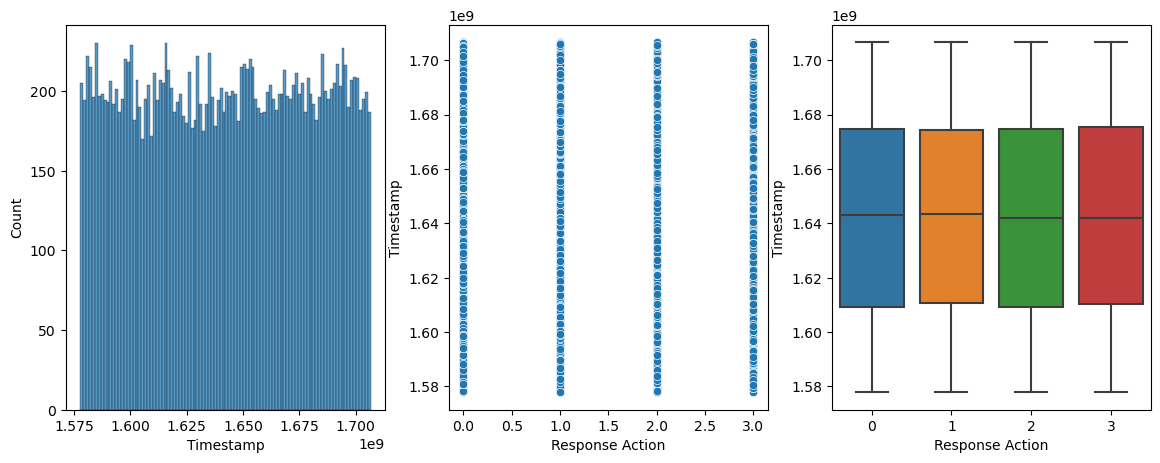

In [90]:
graphics(df['Timestamp'])

Here we can see that there are periods of time when there are more incidents that in other when it decreseases, beeing timestamp data probably should be for months.

c:\Users\jds25\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


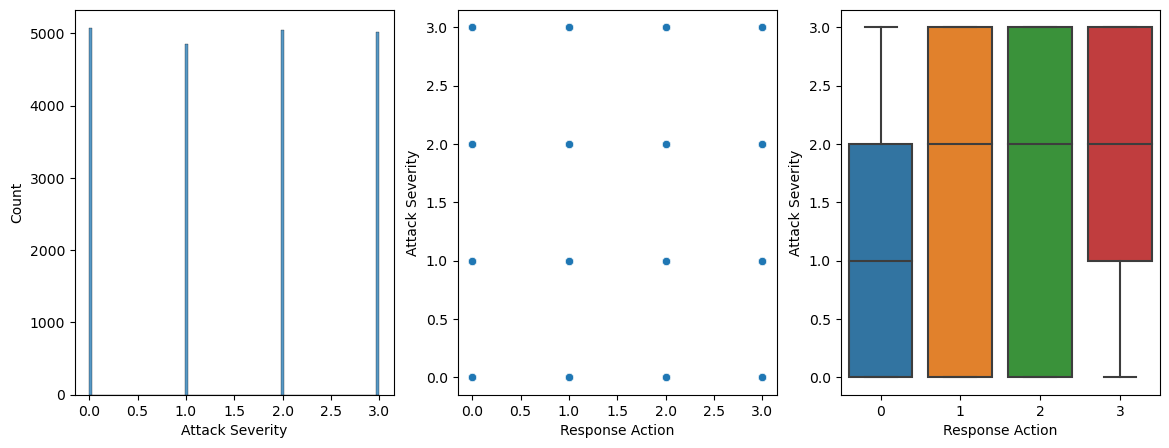

In [91]:
graphics(df['Attack Severity'])

In [92]:
target_dict

{'Blocked': 0, 'Eradicated': 1, 'Recovered': 2, 'Contained': 3}

In this graphic we can se that the 'Attack Severity' is quite balanced and in the boxplot we can see that 'Blocked' responses are rarely used against 'Critical Severity' attacks and 'Contained' responses are rarely used against 'Low Severity' attacks.

C:\Users\jds25\AppData\Local\Temp\ipykernel_16444\79851395.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  graphics(df['Data Exfiltrated'].replace(cbool))
c:\Users\jds25\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


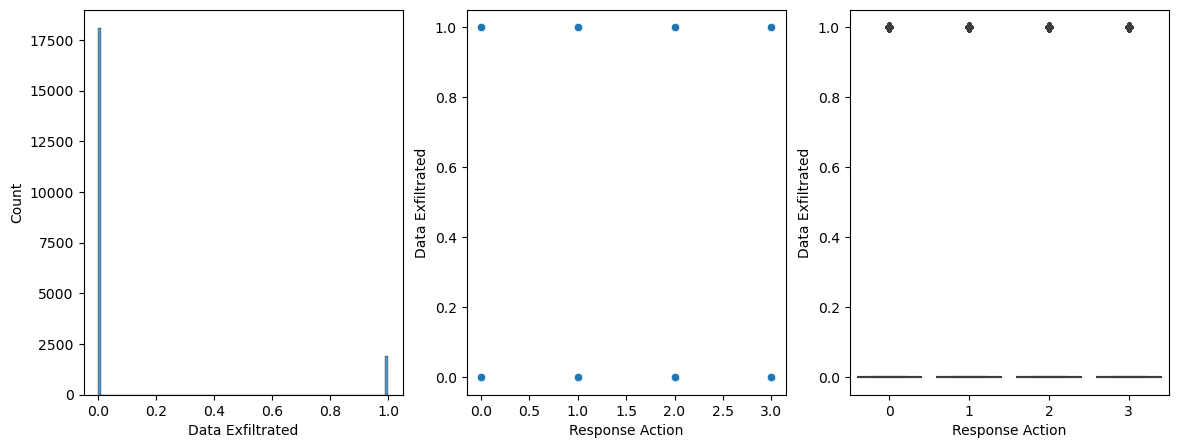

In [93]:
cbool= {True: 1, False: 0}
graphics(df['Data Exfiltrated'].replace(cbool))

Here we just can see that there is low 'Data Exfiltrated' rate.

c:\Users\jds25\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


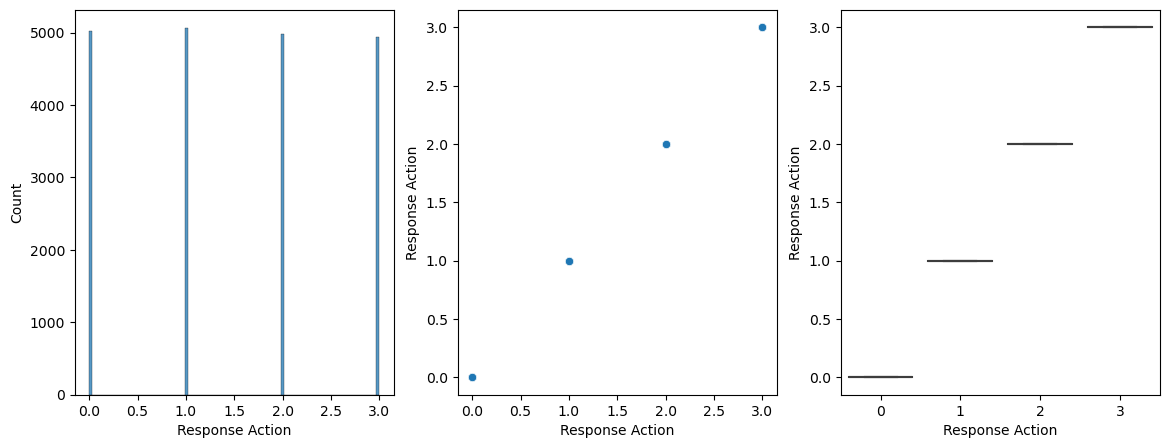

In [94]:
graphics(df['Response Action'])

The 'Response Action' column is perfectly balanced.

c:\Users\jds25\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


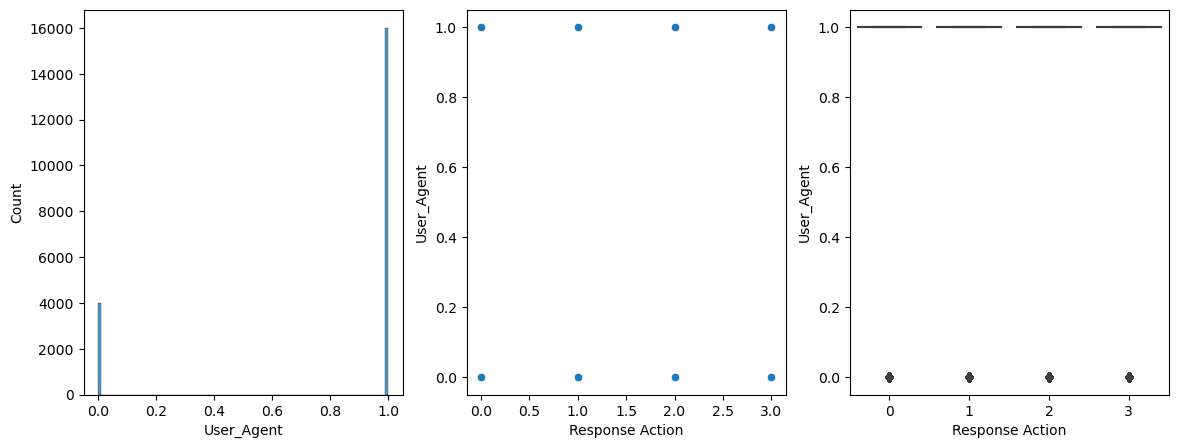

In [95]:
graphics(df['User_Agent'])

The most used 'User_Agent' for attacks is 'Mozilla'.

In [96]:
graphics(df['Attack Type_DDoS'].replace(cbool))

KeyError: 'Attack Type_DDoS'

C:\Users\jds25\AppData\Local\Temp\ipykernel_2632\2323932482.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  graphics(df['Attack Type_Insider Threat'].replace(cbool))
c:\Users\jds25\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


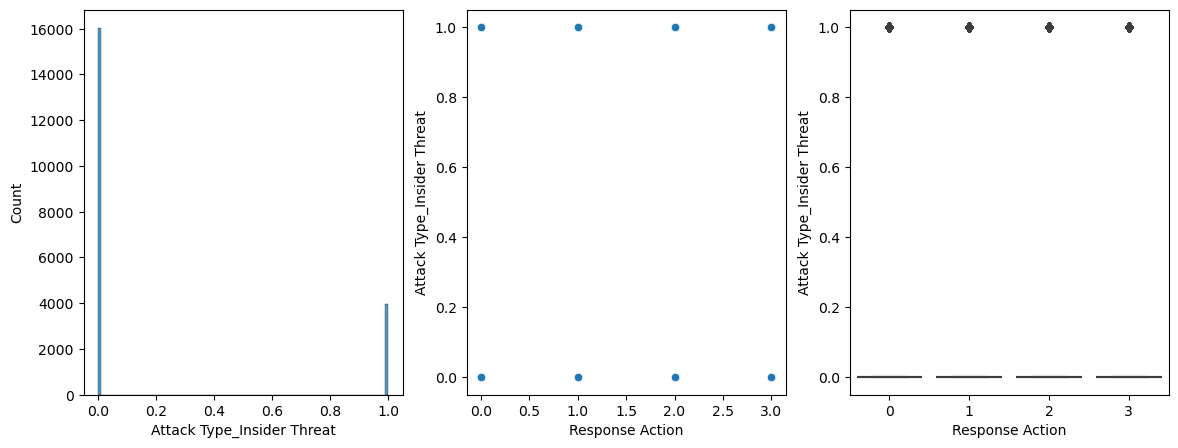

In [ ]:
graphics(df['Attack Type_Insider Threat'].replace(cbool))

C:\Users\jds25\AppData\Local\Temp\ipykernel_2632\3451642164.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  graphics(df['Attack Type_Malware'].replace(cbool))
c:\Users\jds25\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


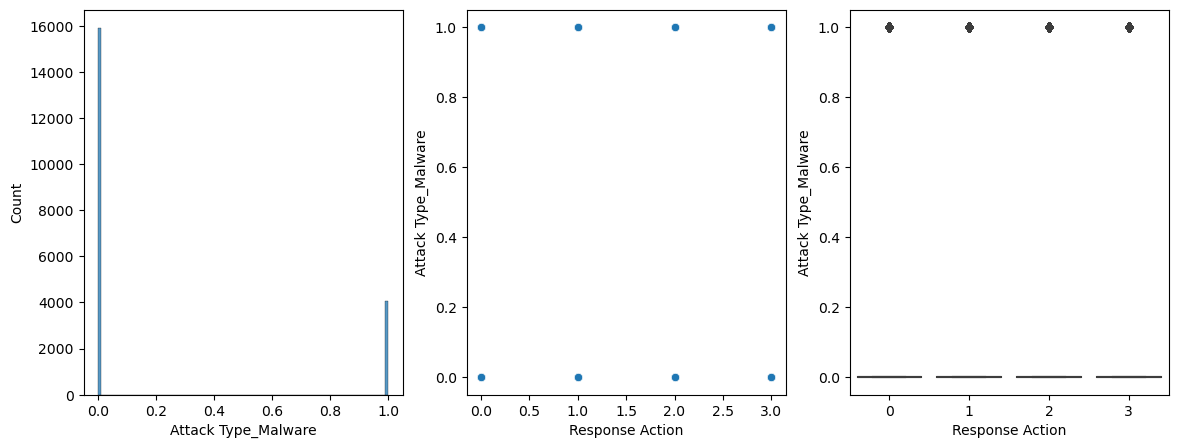

In [ ]:
graphics(df['Attack Type_Malware'].replace(cbool))

And in these columns and the rest of the dataframe we just expect to find the amount of '1's in dataframe.

In [98]:
X= df.drop('Attack Type', axis= 1)
y= df['Attack Type']

In [99]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.02537135, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.34265295, 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.49273505, 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.09980418, 0.33333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.29156126, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.1462771 , 0.66666667, 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
# plt.figure(figsize = (10, 10))
# sns.heatmap(X.corr(), annot = True)
# plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

<Figure size 1000x1000 with 0 Axes>

In [ ]:
pca = PCA()
X = pca.fit_transform(X)

In [ ]:
X.shape

(20000, 874)

In [100]:
kmeans = KMeans(n_clusters = 4, random_state=33)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=33)

In [102]:
kmeans.labels_

array([0, 0, 1, ..., 2, 0, 2])

In [ ]:
df['Cluster']= kmeans.labels_

In [101]:
# labels= kmeans.labels_
# X= np.concatenate(X, labels.reshape(-1,1))
# X

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# X= df.drop('Attack Type', axis= 1)
# y= df['Attack Type']

In [ ]:
# X= scaler.transform(X)

NameError: name 'scaler' is not defined

In [ ]:
df= df.drop('Response Action', axis= 1)

In [ ]:
df_0= df[df['Cluster']== 0]
df_1= df[df['Cluster']== 1]
df_2= df[df['Cluster']== 2]
df_3= df[df['Cluster']== 3]
cluster_list= [ df_0, df_1, df_2, df_3]

In [ ]:
models = [
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('NearestCentroid', NearestCentroid()),
    ('GaussianNB', GaussianNB()),
    ('LogisticRegression', LogisticRegression()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('SVC', SVC()),
    ('GradientBoostingClassifier', GradientBoostingClassifier())
    ]

metrics_dicts= {}

for enum, cluster in enumerate(cluster_list):

    X = cluster.drop("Attack Type", axis=1)
    y = cluster["Attack Type"]

    X= x_scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
        
    cluster_dict= {}

    for name, mdl in models:

        model= mdl
        model.fit(X_train, y_train)
        yhat= model.predict(X_test)
        jaccard= jaccard_score(y_test, yhat, average = "macro")
        accuracy= accuracy_score(y_test, yhat)
        precision= precision_score(y_test, yhat, average = "macro")
        sensibility= recall_score(y_test, yhat, average = "macro")
        f1score= f1_score(y_test, yhat, average = "macro")

        aux_dict= {'jaccard': jaccard,
                    'accuracy': accuracy,
                    'precision': precision,
                    'sensibility': sensibility,
                    'f1_score': f1score}
        
        cluster_dict[name]= aux_dict
    
    metrics_dicts[enum]= cluster_dict

c:\Users\jds25\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
metrics_dicts

{0: {'KNeighborsClassifier': {'jaccard': 0.10750782830476162,
   'accuracy': 0.20871559633027523,
   'precision': 0.20131377706794154,
   'sensibility': 0.2097978049338614,
   'f1_score': 0.19190714386112867},
  'NearestCentroid': {'jaccard': 0.08972059308629228,
   'accuracy': 0.2029816513761468,
   'precision': 0.2137289292292719,
   'sensibility': 0.205681315786619,
   'f1_score': 0.15955742985203844},
  'GaussianNB': {'jaccard': 0.09561223919103587,
   'accuracy': 0.17488532110091742,
   'precision': 0.1743865601353792,
   'sensibility': 0.17531485615273873,
   'f1_score': 0.17439381208689053},
  'LogisticRegression': {'jaccard': 0.10199378509092567,
   'accuracy': 0.18520642201834864,
   'precision': 0.18494763943347753,
   'sensibility': 0.1857447895142635,
   'f1_score': 0.18485579565274418},
  'DecisionTreeClassifier': {'jaccard': 0.1149635927023505,
   'accuracy': 0.20642201834862386,
   'precision': 0.20651166197146903,
   'sensibility': 0.20658772997522495,
   'f1_score': 0.

In [ ]:
pd.DataFrame(metrics_dict)

NameError: name 'pd' is not defined

In [ ]:
model_dict= {}

for cluster in metrics_dicts:

    mscore= 0
    fmodel= str()
    
    for model in metrics_dicts[cluster]:

        jacccard= metrics_dicts[cluster][model]['jaccard']
        accuracy= metrics_dicts[cluster][model]['accuracy']
        precision= metrics_dicts[cluster][model]['precision']
        sensibility= metrics_dicts[cluster][model]['f1_score']
        f1= metrics_dicts[cluster][model]['f1_score']

        tscore= jaccard+ accuracy+ precision+ sensibility+ f1

        if tscore> mscore:

            mscore= tscore
            fmodel= model
    
    model_dict[cluster]= {fmodel: mscore}


In [ ]:
model_dict

{0: {'RandomForestClassifier': 0.9498671919593377},
 1: {'LogisticRegression': 0.8840078526060653},
 2: {'LogisticRegression': 0.9990800394087616},
 3: {'DecisionTreeClassifier': 0.9818511507934299}}

In [ ]:
metrics_dicts[2]['LogisticRegression']

{'jaccard': 0.12444113824047028,
 'accuracy': 0.2209737827715356,
 'precision': 0.2232649673526052,
 'sensibility': 0.22119563220976507,
 'f1_score': 0.22107581823125505}